In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error
np.random.seed(29)

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

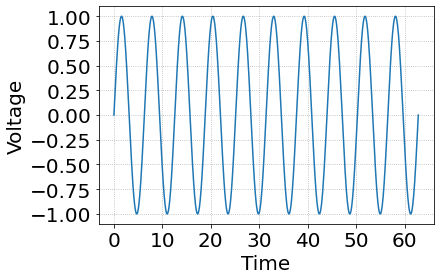

In [2]:
plt.grid(linestyle='dotted')
t = np.linspace(0,20*pi,1000)
x = np.sin(t)
plt.plot(t, x)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Voltage', fontsize = 20)
#plt.legend(['Actual function' , 'Learned function', 'Training Data'], prop={'size': 16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("Results/test2_input.png", dpi = 300, bbox_inches='tight')

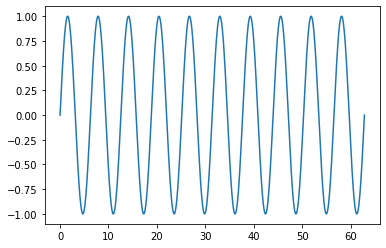

In [3]:
plt.plot(t,x)

In [4]:
dx = fd._differentiate(x, t)

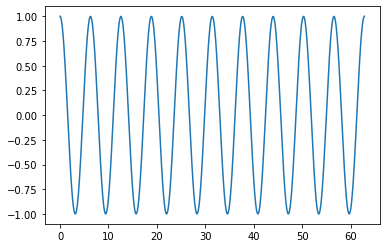

In [5]:
plt.plot(t,dx)

In [6]:
mdx = np.abs(dx)

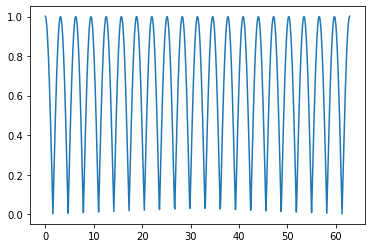

In [7]:
plt.plot(t, mdx)

In [8]:
def model(y, t):
    dydt = np.cos(t) - 0.5*np.abs(np.cos(t))*y - 2*np.cos(t)*np.abs(y)
    return dydt

In [9]:
y0 = 0
y = odeint(model, y0, t)
print(y.shape)
# Noise level
sigma = 0.01
y = y*(1 + sigma*np.random.randn(1000,1))

(1000, 1)


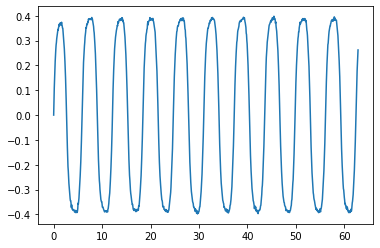

In [10]:
plt.plot(t,y)

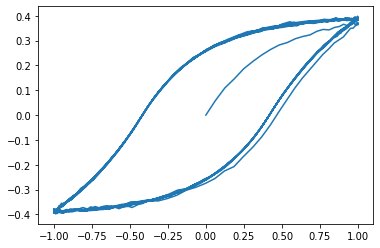

In [11]:
plt.plot(x, y)

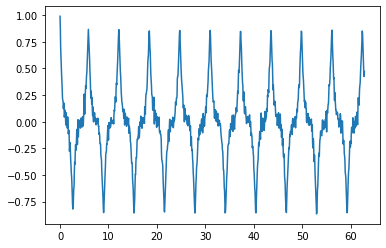

In [12]:
dy = fd._differentiate(y, t)
plt.plot(t, dy)

In [13]:
my = np.abs(y)
my = my.reshape(-1,)

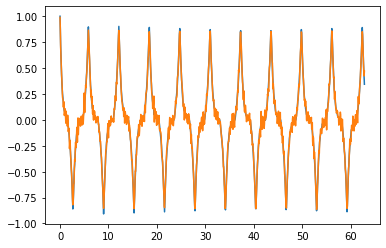

In [14]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
t1 = dx
t2 = mdx*y
t3 = dx*my
terms = t1-0.5*t2-2*t3
plt.plot(t,terms)
plt.plot(t, dy)

In [15]:
X = np.stack((y, x, dx, mdx, my), axis=-1)

In [16]:
model = ps.SINDy()
model.fit(X,t)
model.print()

(x0)' = 0.994 x2 + -0.504 x0 x3 + -1.974 x2 x4
(x1)' = 1.000 x2
(x2)' = -0.999 x1
(x3)' = -39.797 1 + -2.128 x0 + 4.116 x1 + 2.232 x2 + 1.816 x3 + -25.462 x0^2 + 53.122 x0 x1 + 24.970 x0 x2 + -5.344 x0 x3 + 10.928 x0 x4 + 26.724 x1^2 + -13.160 x1 x2 + 1.663 x1 x3 + -12.603 x1 x4 + 17.588 x2^2 + 0.397 x2 x3 + -5.489 x2 x4 + 17.588 x3^2 + -0.937 x3 x4 + -25.462 x4^2
(x4)' = -26.901 1 + -3.134 x0 + 2.749 x1 + 1.064 x2 + 9.270 x3 + 19.901 x4 + -5.267 x0^2 + 5.057 x0 x1 + 6.338 x0 x2 + -0.550 x0 x3 + 4.223 x0 x4 + 18.655 x1^2 + -2.605 x1 x2 + 0.077 x1 x3 + -5.518 x1 x4 + 8.581 x2^2 + 0.265 x2 x3 + -2.503 x2 x4 + 8.581 x3^2 + -19.816 x3 x4 + -5.267 x4^2


In [17]:
#kkk

In [18]:
c1 = 0.994
c2 = -0.504
c3 = -1.974
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [19]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

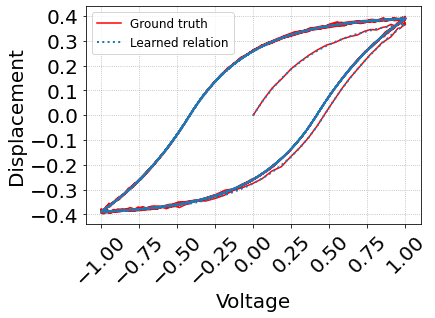

In [20]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
plt.plot(x, y_test, linewidth=2, linestyle=':')
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
plt.legend(['Ground truth' , 'Learned relation'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
plt.savefig("Pics/Slide9_1.png", dpi = 1000, bbox_inches='tight')

(array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
         1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

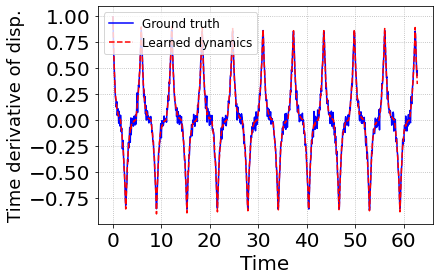

In [21]:
test = c1*t1+c2*t2+c3*t3
plt.plot(t,dy, 'b')
plt.plot(t,test, '--r')
plt.grid(linestyle='dotted')
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Time derivative of disp.', fontsize = 18)
plt.legend(['Ground truth' , 'Learned dynamics'], prop={'size': 12})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("Results/test2_Output.jpg", dpi = 300, bbox_inches='tight')

In [22]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test SINDy: ", relative_error_test*100, "%")

Relative Error Test SINDy:  0.01028938010868681 %


In [23]:
t1=t1.reshape(-1,1)
t2=t2.reshape(-1,1)
t3=t3.reshape(-1,1)
Y = np.concatenate((t1, t2, t3), axis=1)
Y.shape
dy = dy.reshape(-1,1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, dy, test_size=0.25, random_state=42)

In [25]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 0.88494087 -0.57815973 -1.49995566]]
[0.00139348]


In [26]:
#kkk

In [27]:
c1 = 0.884
c2 = -0.578
c3 = -1.49
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [28]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

In [29]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test Ridge: ", relative_error_test*100, "%")

Relative Error Test Ridge:  0.13094014721911246 %


In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)

In [31]:
linreg.coef_

array([[ 0.99193534, -0.49753854, -1.96429786]])

In [32]:
linreg.intercept_

array([0.00106789])

In [33]:
#kkk

In [34]:
c1 = 0.991
c2 = -0.49
c3 = -1.964
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [35]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

In [36]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test Lin reg: ", relative_error_test*100, "%")

Relative Error Test Lin reg:  0.023556723920038575 %


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, dy, test_size=0.25, random_state=42)

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"
# Random Seed for dataset generation
sampling_seed = 78
torch.manual_seed(sampling_seed)

# Number of training samples
n_samples = 1000

x = X_train
y = y_train
y = y.reshape(-1,1)

x = x.astype(np.float32)
y = y.astype(np.float32)

x = torch.from_numpy(x)
y = torch.from_numpy(y)

batch_size = n_samples
training_set = DataLoader(torch.utils.data.TensorDataset(x, y), batch_size=batch_size, shuffle=True)

In [40]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)

def NeuralNet_Seq(input_dimension, output_dimension, n_hidden_layers, neurons):
    modules = list()
    modules.append(nn.Linear(input_dimension, neurons))
    modules.append(nn.Tanh())
    for _ in range(n_hidden_layers):
        modules.append(nn.Linear(neurons, neurons))
        modules.append(nn.Tanh())
    modules.append(nn.Linear(neurons, output_dimension))
    model =  nn.Sequential(*modules)
    return model

  


In [41]:
# Model definition
my_network = NeuralNet(input_dimension=x.shape[1], output_dimension=y.shape[1], n_hidden_layers=4, neurons=20)
# my_network = NeuralNet_Seq(input_dimension=x.shape[1], output_dimension=y.shape[1], n_hidden_layers=4, neurons=20)

In [42]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
# Model definition

# Predict network value of x
print(my_network(x))

tensor([[-0.2306],
        [-1.0147],
        [-0.8295],
        [-1.0175],
        [-0.8144],
        [-0.6287],
        [-0.8034],
        [-0.7562],
        [-0.6968],
        [-0.8283],
        [ 0.2245],
        [ 0.7182],
        [-0.8943],
        [ 0.7393],
        [ 0.5749],
        [ 0.7951],
        [-0.7965],
        [-0.1821],
        [ 0.2067],
        [-0.2160],
        [-0.8886],
        [-0.7790],
        [-0.6741],
        [ 0.7279],
        [-0.5856],
        [-0.7158],
        [-0.9437],
        [-0.6059],
        [-0.1871],
        [-0.3349],
        [-0.6412],
        [-0.8515],
        [ 0.7861],
        [-0.8743],
        [-0.6060],
        [-0.7701],
        [ 0.5736],
        [ 0.7614],
        [ 0.1335],
        [ 0.6874],
        [ 0.9026],
        [-0.9083],
        [-0.6622],
        [ 0.6782],
        [ 0.6306],
        [ 0.7857],
        [ 0.4716],
        [ 0.1302],
        [-0.7478],
        [ 0.5686],
        [ 0.9755],
        [ 0.8901],
        [-0.

In [43]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [44]:
def fit(model, training_set, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (x_train_, u_train_) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                u_pred_ = model(x_train_)
                # Item 1. below
                loss = torch.mean((u_pred_.reshape(-1, ) - u_train_.reshape(-1, ))**p)
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history


In [45]:
n_epochs = 1000
history = fit(my_network, training_set, n_epochs, optimizer_, p=2, verbose=True )

################################  0  ################################
Loss:  0.9658915996551514
################################  1  ################################
Loss:  0.9194313883781433
################################  2  ################################
Loss:  0.7390236854553223
################################  3  ################################
Loss:  0.5687392950057983
################################  4  ################################
Loss:  0.45325732231140137
################################  5  ################################
Loss:  0.38344189524650574
################################  6  ################################
Loss:  0.3367900848388672
################################  7  ################################
Loss:  0.30229100584983826
################################  8  ################################
Loss:  0.27517959475517273
################################  9  ################################
Loss:  0.25299203395843506
################################  1

Loss:  0.0013014599680900574
################################  85  ################################
Loss:  0.0012995338765904307
################################  86  ################################
Loss:  0.0012979229213669896
################################  87  ################################
Loss:  0.0012965966016054153
################################  88  ################################
Loss:  0.0012954857666045427
################################  89  ################################
Loss:  0.0012945526978000998
################################  90  ################################
Loss:  0.001293760142289102
################################  91  ################################
Loss:  0.0012930803932249546
################################  92  ################################
Loss:  0.001292488188482821
################################  93  ################################
Loss:  0.0012919598957523704
################################  94  ################################
Lo

Loss:  0.0012685494730249047
################################  173  ################################
Loss:  0.0012684803223237395
################################  174  ################################
Loss:  0.001268412102945149
################################  175  ################################
Loss:  0.0012683431850746274
################################  176  ################################
Loss:  0.00126826879568398
################################  177  ################################
Loss:  0.001268200227059424
################################  178  ################################
Loss:  0.0012681357329711318
################################  179  ################################
Loss:  0.0012680753134191036
################################  180  ################################
Loss:  0.0012680159416049719
################################  181  ################################
Loss:  0.0012679584324359894
################################  182  ###########################

Loss:  0.001260329969227314
################################  266  ################################
Loss:  0.0012602800270542502
################################  267  ################################
Loss:  0.0012602274073287845
################################  268  ################################
Loss:  0.0012601710623130202
################################  269  ################################
Loss:  0.0012601104099303484
################################  270  ################################
Loss:  0.0012600457994267344
################################  271  ################################
Loss:  0.0012599764158949256
################################  272  ################################
Loss:  0.0012599022593349218
################################  273  ################################
Loss:  0.0012598237954080105
################################  274  ################################
Loss:  0.0012597424210980535
################################  275  ########################

Loss:  0.0012554577551782131
################################  359  ################################
Loss:  0.0012554108398035169
################################  360  ################################
Loss:  0.0012553600827232003
################################  361  ################################
Loss:  0.001255310489796102
################################  362  ################################
Loss:  0.001255256705917418
################################  363  ################################
Loss:  0.001255202922038734
################################  364  ################################
Loss:  0.0012551475083455443
################################  365  ################################
Loss:  0.00125509116332978
################################  366  ################################
Loss:  0.0012550322571769357
################################  367  ################################
Loss:  0.0012549753300845623
################################  368  ############################

Loss:  0.0012502834433689713
################################  453  ################################
Loss:  0.001250247354619205
################################  454  ################################
Loss:  0.001250213012099266
################################  455  ################################
Loss:  0.0012501778546720743
################################  456  ################################
Loss:  0.001250141765922308
################################  457  ################################
Loss:  0.0012501042801886797
################################  458  ################################
Loss:  0.0012500665616244078
################################  459  ################################
Loss:  0.001250028726644814
################################  460  ################################
Loss:  0.0012499906588345766
################################  461  ################################
Loss:  0.001249951310455799
################################  462  ############################

Loss:  0.0012483110185712576
################################  544  ################################
Loss:  0.0012482906458899379
################################  545  ################################
Loss:  0.0012482709717005491
################################  546  ################################
Loss:  0.0012482496676966548
################################  547  ################################
Loss:  0.0012482267338782549
################################  548  ################################
Loss:  0.0012482010060921311
################################  549  ################################
Loss:  0.0012481756275519729
################################  550  ################################
Loss:  0.0012481469893828034
################################  551  ################################
Loss:  0.0012481134617701173
################################  552  ################################
Loss:  0.0012480826117098331
################################  553  #######################

Loss:  0.00124580308329314
################################  626  ################################
Loss:  0.0012457955162972212
################################  627  ################################
Loss:  0.0012457889970391989
################################  628  ################################
Loss:  0.0012457824777811766
################################  629  ################################
Loss:  0.0012457759585231543
################################  630  ################################
Loss:  0.0012457699049264193
################################  631  ################################
Loss:  0.0012457644334062934
################################  632  ################################
Loss:  0.0012457574484869838
################################  633  ################################
Loss:  0.001245751976966858
################################  634  ################################
Loss:  0.0012457456905394793
################################  635  ##########################

Loss:  0.0012450370704755187
################################  714  ################################
Loss:  0.0012450017966330051
################################  715  ################################
Loss:  0.0012449697824195027
################################  716  ################################
Loss:  0.001244936604052782
################################  717  ################################
Loss:  0.0012449007481336594
################################  718  ################################
Loss:  0.001244866638444364
################################  719  ################################
Loss:  0.0012448359047994018
################################  720  ################################
Loss:  0.001244803424924612
################################  721  ################################
Loss:  0.001244774553924799
################################  722  ################################
Loss:  0.001244746963493526
################################  723  ############################

Loss:  0.001243267091922462
################################  797  ################################
Loss:  0.0012432518415153027
################################  798  ################################
Loss:  0.0012432384537532926
################################  799  ################################
Loss:  0.0012432239018380642
################################  800  ################################
Loss:  0.0012432116782292724
################################  801  ################################
Loss:  0.0012431993382051587
################################  802  ################################
Loss:  0.001243187696672976
################################  803  ################################
Loss:  0.0012431767536327243
################################  804  ################################
Loss:  0.0012431656941771507
################################  805  ################################
Loss:  0.0012431555660441518
################################  806  #########################

################################  890  ################################
Loss:  0.0012419034028425813
################################  891  ################################
Loss:  0.0012418933911249042
################################  892  ################################
Loss:  0.0012418845435604453
################################  893  ################################
Loss:  0.001241875346750021
################################  894  ################################
Loss:  0.0012418658006936312
################################  895  ################################
Loss:  0.0012418567202985287
################################  896  ################################
Loss:  0.0012418479891493917
################################  897  ################################
Loss:  0.0012418385595083237
################################  898  ################################
Loss:  0.0012418301776051521
################################  899  ################################
Loss:  0.00124182179

Loss:  0.001241108519025147
################################  975  ################################
Loss:  0.001241101766936481
################################  976  ################################
Loss:  0.0012410947820171714
################################  977  ################################
Loss:  0.0012410895433276892
################################  978  ################################
Loss:  0.001241084304638207
################################  979  ################################
Loss:  0.001241079531610012
################################  980  ################################
Loss:  0.0012410742929205298
################################  981  ################################
Loss:  0.0012410690542310476
################################  982  ################################
Loss:  0.001241064048372209
################################  983  ################################
Loss:  0.0012410595081746578
################################  984  ############################

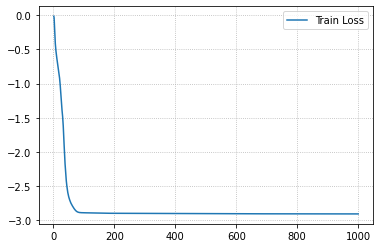

In [46]:
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1,n_epochs+1), np.log10(history), label="Train Loss")
plt.legend()

In [47]:
X_test = X_test.astype(np.float32)
X_test = torch.from_numpy(X_test)

y_test = y_test.astype(np.float32)
y_test = torch.from_numpy(y_test)

y_test_pred = my_network(X_test).reshape(-1,1)

In [48]:
y_test = y_test.reshape(-1,1)

In [49]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((y_test_pred - y_test)**2)/torch.mean(y_test**2)
print("Relative Error Test DNN: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test DNN:  1.216082088649273 %


In [50]:
y_test_pred.shape

torch.Size([250, 1])

In [51]:
y_test.shape

torch.Size([250, 1])